# **PRÁCTICA 2: AUTOENCODERS - Parte 2: Convolucionales**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 4ª curso del Grado Ciencia de Datos

## **Ejercicio Extra 1: Incluye regularización de actividad en el dominio interno y compara los resultados**
---

### Autoencoder convolucional

**Codificador automático convolucional**

<p align="justify">Dado que nuestras entradas son imágenes, tiene sentido utilizar redes neuronales convolucionales (convnets) como codificadores y decodificadores. En entornos prácticos, los codificadores automáticos aplicados a las imágenes son siempre codificadores automáticos convolucionales, simplemente funcionan mucho mejor.</p>

<p align="justify">Implementemos uno. El codificador consistirá en una pila de capas Conv2Dy MaxPooling2D(la agrupación máxima se utiliza para el muestreo descendente espacial), mientras que el decodificador consistirá en una pila de capas Conv2Dy .UpSampling2D.</p>

<p align="justify">Es decir, comenzaremos de manera simple, con una sola capa neuronal completamente conectada como codificador y decodificador:</p>

In [1]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [2]:
# MODELO

# ENCODER activity_regularizer (parámentro de las Dense); activity_regularizer = regularizers.l1(0.01)
input_img = Input(shape=(28, 28, 1))  
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# DECODER
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [3]:
opt = Adam(learning_rate=0.0001)
autoencoder0 = Model(input_img, decoded)
autoencoder0.compile(optimizer=opt, loss='mse')

In [4]:
autoencoder0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

<p align="justify">Para entrenarlo, usaremos los dígitos MNIST originales:</p>

In [5]:
# DATOS
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  

11490434/11490434 [==============================] - 0s 0us/step


<p align="justify">Entrenemos este modelo durante 100 épocas.</p>

In [6]:
# ENTRENAMIENTO
from keras.callbacks import TensorBoard

autoencoder0.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 15s 7ms/step - loss: 0.1194 - val_loss: 0.0606
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0508 - val_loss: 0.0449
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0426 - val_loss: 0.0400
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0383 - val_loss: 0.0360
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0345 - val_loss: 0.0326
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0315 - val_loss: 0.0299
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0291 - val_loss: 0.0279
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0274 - val_loss: 0.0263
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0260 - val_loss: 0.0251
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0249 - val_l

<p align="justify">Después de 100 épocas, el codificador automático parece alcanzar un valor de pérdida de validación/entrenamiento estable de aproximadamente 0.0122. Podemos intentar visualizar las entradas reconstruidas y las representaciones codificadas. Usaremos Matplotlib en el siguiente apartado.</p>

### Autoencoder convolucional con regularizador 

In [7]:
# MODELO

# ENCODER 
input_img = Input(shape=(28, 28, 1))  
x = Conv2D(16, (3, 3), activation='relu', padding='same',activity_regularizer = regularizers.l1(0.01))(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# DECODER
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [8]:
opt = Adam(learning_rate=0.0001)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=opt, loss='mse')

In [9]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 8)           584 

In [10]:
# ENTRENAMIENTO
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 4s 7ms/step - loss: 1.7228 - val_loss: 0.6034
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3073 - val_loss: 0.1618
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1222 - val_loss: 0.0960
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0847 - val_loss: 0.0762
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0717 - val_loss: 0.0685
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0665 - val_loss: 0.0650
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0638 - val_loss: 0.0628
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0618 - val_loss: 0.0609
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0598 - val_loss: 0.0588
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0577 - val_lo

### Comparamos

In [11]:
# convolucional
decoded_imgs0 = autoencoder0.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [12]:
# convolucional + regularizador
decoded_imgs1 = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


Imágenes originales


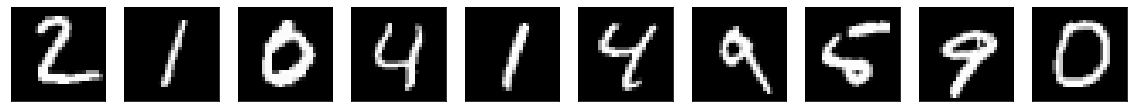

Reconstrucción (convolucional):


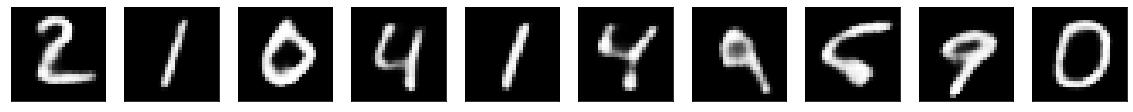

Reconstrucción (convolucional + regularizador):


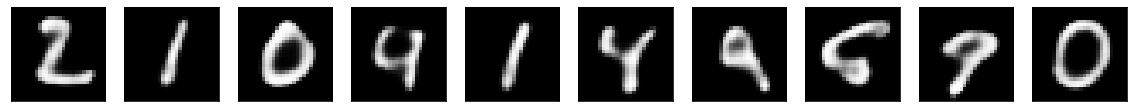

In [14]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
print("Imágenes originales")
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 4))
print("Reconstrucción (convolucional):")
for i in range(1, n + 1):
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs0[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 4))
print("Reconstrucción (convolucional + regularizador):")
for i in range(1, n + 1):
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<p align="justify">Las estrategias de regularización incorporan penalizaciones en el ajuste por mínimos cuadrados ordinarios (OLS) con el objetivo de evitar overfitting, reducir varianza, atenuar el efecto de la correlación entre predictores y minimizar la influencia en el modelo de los predictores menos relevantes. Por lo general, aplicando regularización se consigue modelos con mayor poder predictivo (generalización).</p>


<p align="justify">Los regularizadores le permiten aplicar penalizaciones en los parámetros de la capa o la actividad de la capa durante la optimización. Estas penalizaciones se suman a la función de pérdida que optimiza la red. En este caso se ha añadido un regularizador de actividad, este aplica una penalización en la salida de la capa.</p>

<p align="justify">Por lo tanto, podemos decir que como regularizador de actividad lo que hace es penalizar la actividad de la capa, consiguiendo así que generalice mejor y que no entremos en sobre ajuste, por lo tanto, puede pasar que la recontrucción nos salga peor. Este no es el caso, la visualización de los dígitos es bastant4e parecida.</p>